In [1]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

/opt/conda/lib/python3.7/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
data=pd.read_csv("/kaggle/input/analytics-vidhya-jobathon/train_IxoE5JN.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [5]:
data.head()

row_id             datetime       energy
0       1  2008-03-01 00:00:00  1259.985563
1       2  2008-03-01 01:00:00  1095.541500
2       3  2008-03-01 02:00:00  1056.247500
3       4  2008-03-01 03:00:00  1034.742000
4       5  2008-03-01 04:00:00  1026.334500

In [6]:
data.datetime=pd.to_datetime(data.datetime,yearfirst=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [8]:
data.head()

row_id            datetime       energy
0       1 2008-03-01 00:00:00  1259.985563
1       2 2008-03-01 01:00:00  1095.541500
2       3 2008-03-01 02:00:00  1056.247500
3       4 2008-03-01 03:00:00  1034.742000
4       5 2008-03-01 04:00:00  1026.334500

In [9]:
data["unique_id"]='energy_demand'

In [10]:
data.head()

row_id            datetime       energy      unique_id
0       1 2008-03-01 00:00:00  1259.985563  energy_demand
1       2 2008-03-01 01:00:00  1095.541500  energy_demand
2       3 2008-03-01 02:00:00  1056.247500  energy_demand
3       4 2008-03-01 03:00:00  1034.742000  energy_demand
4       5 2008-03-01 04:00:00  1026.334500  energy_demand

In [11]:
train_data=data.set_index('datetime')[:"2017-12-31"].reset_index().drop("row_id", axis=1)
test_data=data.set_index('datetime')["2018-1-1":].reset_index().drop("row_id", axis=1)

In [12]:
train_data.isna().sum()

datetime        0
energy       1726
unique_id       0
dtype: int64

In [13]:
test_data.isna().sum()

datetime       0
energy       174
unique_id      0
dtype: int64

In [14]:
train_data.energy.fillna(method='bfill',inplace=True)
test_data.energy.fillna(method='bfill',inplace=True)

<AxesSubplot:xlabel='datetime', ylabel='energy'>

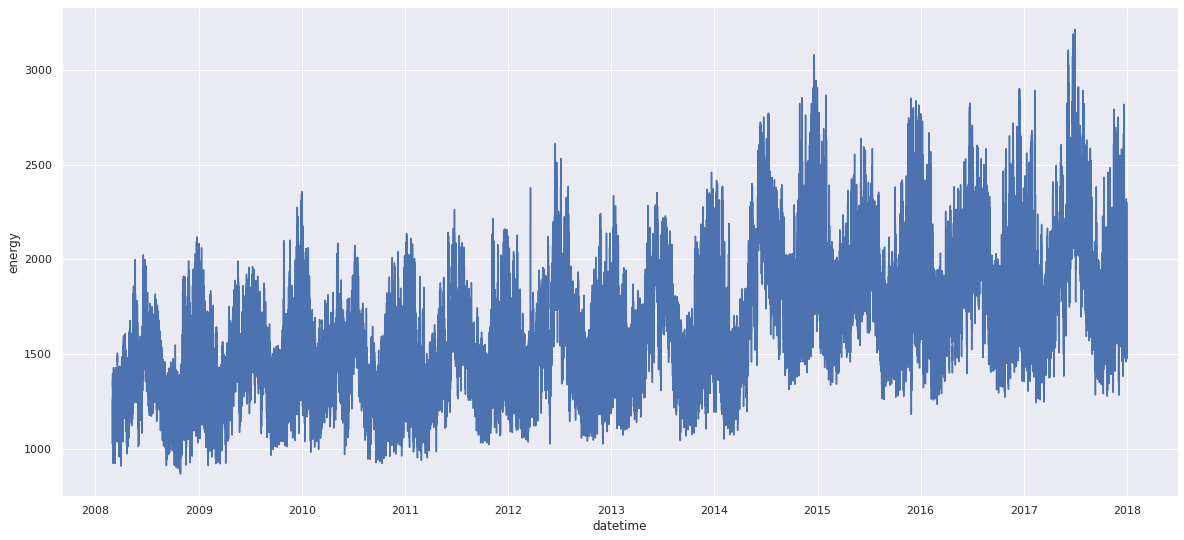

In [15]:
plt.figure(figsize=(20,9))
sns.lineplot(x=train_data.datetime, y=train_data.energy)

<AxesSubplot:xlabel='datetime', ylabel='energy'>

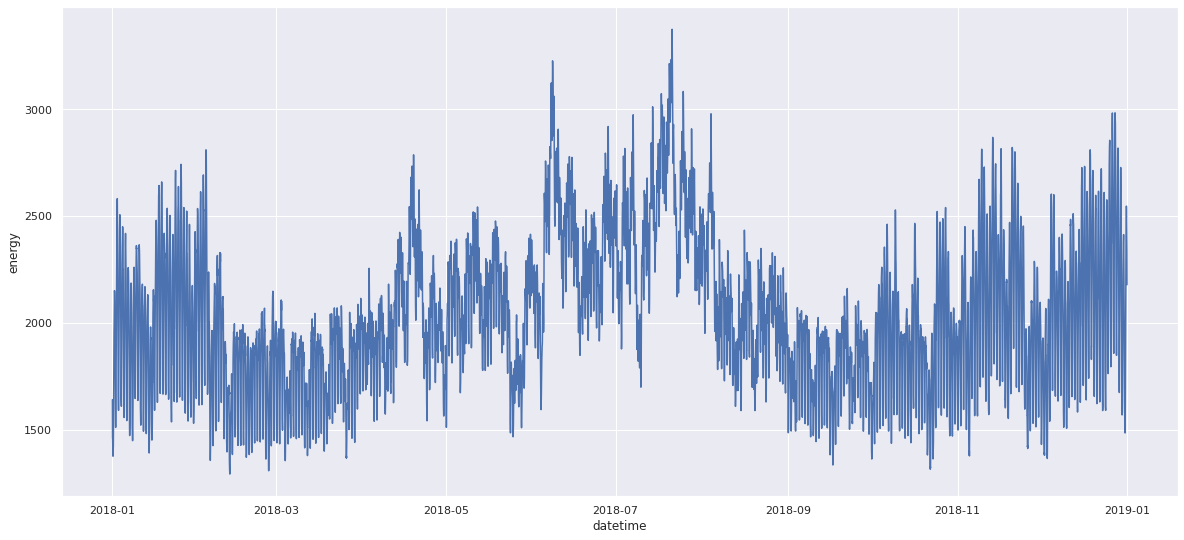

In [16]:
plt.figure(figsize=(20,9))
sns.lineplot(x=test_data.datetime, y=test_data.energy)

In [17]:
train_data.rename(columns={'datetime':'ds', 'energy':'y'}, inplace=True)
test_data.rename(columns={'datetime':'ds', 'energy':'y'}, inplace=True)

In [18]:
StatsForecast.plot(train_data)

In [19]:
StatsForecast.plot(test_data)

In [20]:
models=[AutoARIMA(season_length=24, num_cores=4, stepwise=False)]
sf = StatsForecast( 
    models=models,
    freq='H')

In [21]:
sf.fit(train_data)

StatsForecast(models=[AutoARIMA])

In [22]:
forecast_df=sf.predict(h=8760, level=[90])

In [23]:
forecast_df.tail()

ds    AutoARIMA  AutoARIMA-lo-90  \
unique_id                                                         
energy_demand 2018-12-31 19:00:00  2268.127441      -162.061050   
energy_demand 2018-12-31 20:00:00  2220.675293      -209.513260   
energy_demand 2018-12-31 21:00:00  2194.095459      -236.093094   
energy_demand 2018-12-31 22:00:00  2184.058594      -246.129913   
energy_demand 2018-12-31 23:00:00  2090.428711      -339.759796   

               AutoARIMA-hi-90  
unique_id                       
energy_demand      4698.315918  
energy_demand      4650.863770  
energy_demand      4624.284180  
energy_demand      4614.247070  
energy_demand      4520.617188

In [24]:
StatsForecast.plot(forecast_df)

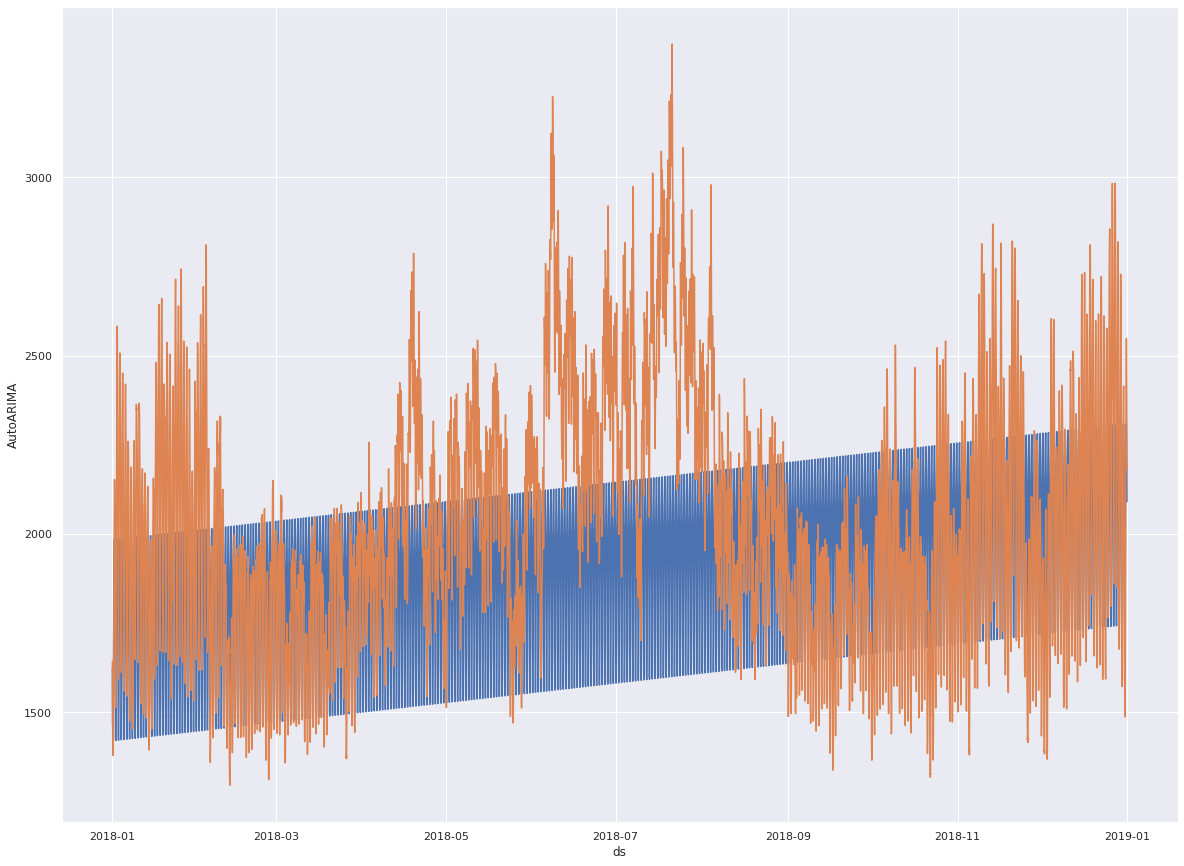

In [25]:
plt.figure(figsize=(20,15))
sns.lineplot(x='ds',y='AutoARIMA', data=forecast_df.reset_index())
sns.lineplot(x=test_data.ds, y=test_data.y)
plt.show()

In [26]:
from sklearn.metrics import r2_score 

In [27]:
print("test", r2_score(y_test,forecast_df.y.reset_index()))

NameError: name 'y_test' is not defined